# 5. Let’s use the newly created modules in unsupervised to cluster some toy data.

* a. Use the following code snippet to create scattered data X
from sklearn.datasets import make_blobs
X, y = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,
)
* b. Plot the resulting dataset. How many clusters are there? How far are they from one another?
* c. For both k-means and k-medoids (your implementations), calculate the silhouette plots and
coefficients for each run, iterating K from 1 to 5 clusters.
* d. What number of K got the best silhouette score? What can you say about the figures? Is this the
expected result?

In [16]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [5]:
X, y = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,
)

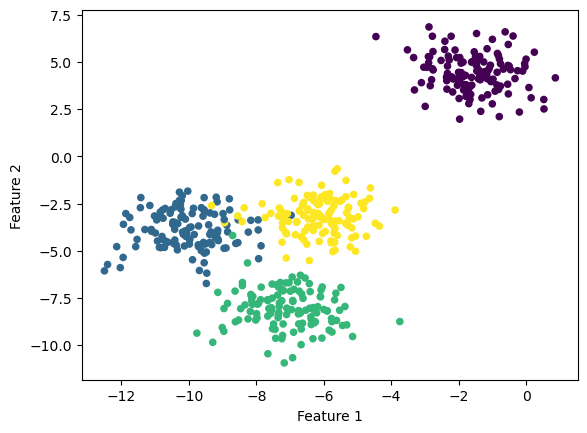

In [6]:
plt.scatter(X[:, 0], X[:, 1],c=y, s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

I see two groups far from each other. But, in one of the groups, I think it would be divided into three groups, to finally have four groups.

In [7]:
from model import myKmeans, myKMedoids

Test myKmeans

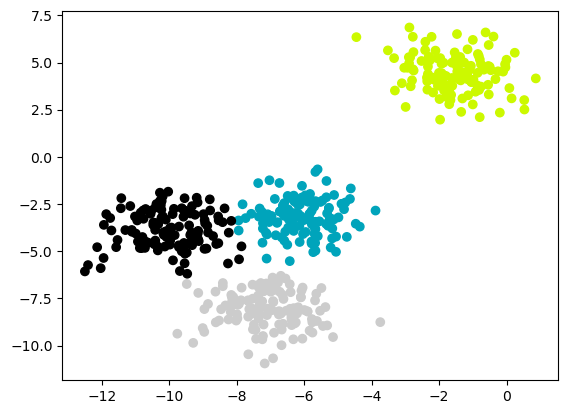

In [13]:
# Initialize KMeans
kmeans = myKmeans(n_clusters=4,random_state=190)

# fit the data & predict cluster labels
kmeans.fit(X)
cluster_kmeans = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster_kmeans, cmap='nipy_spectral')
plt.show()

Test myKMedoids

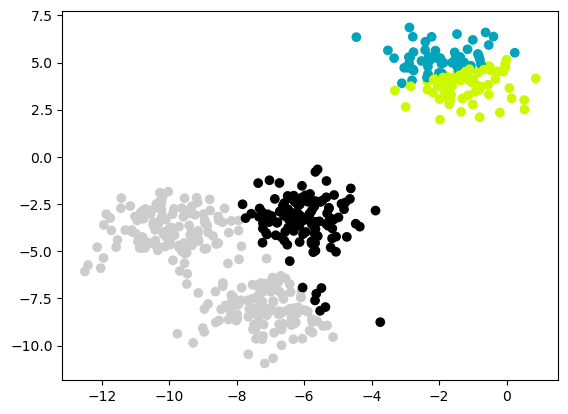

In [12]:
# Initialize KMeans
kmedoids = myKMedoids(n_clusters=4,random_state=190)
# fit the data & predict cluster labels
kmedoids.fit(X)
cluster_kmedoids = kmedoids.predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster_kmedoids, cmap='nipy_spectral')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5615736590677248


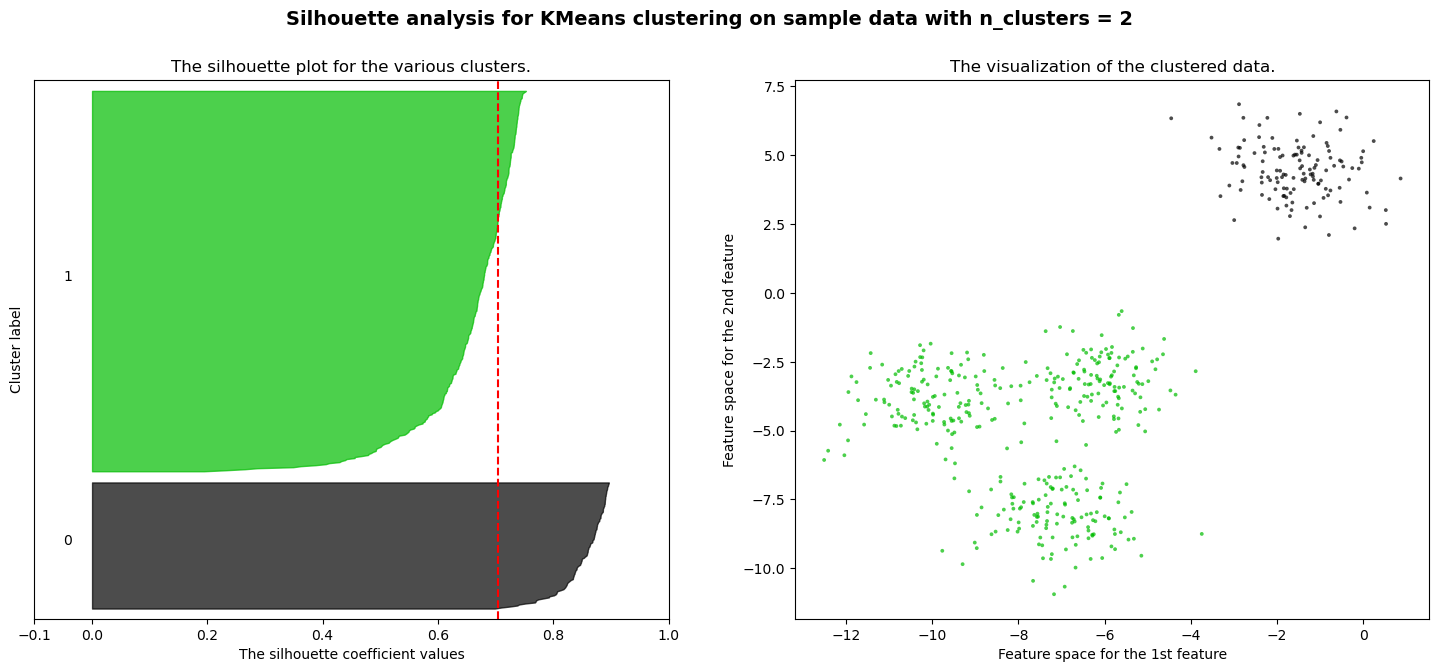

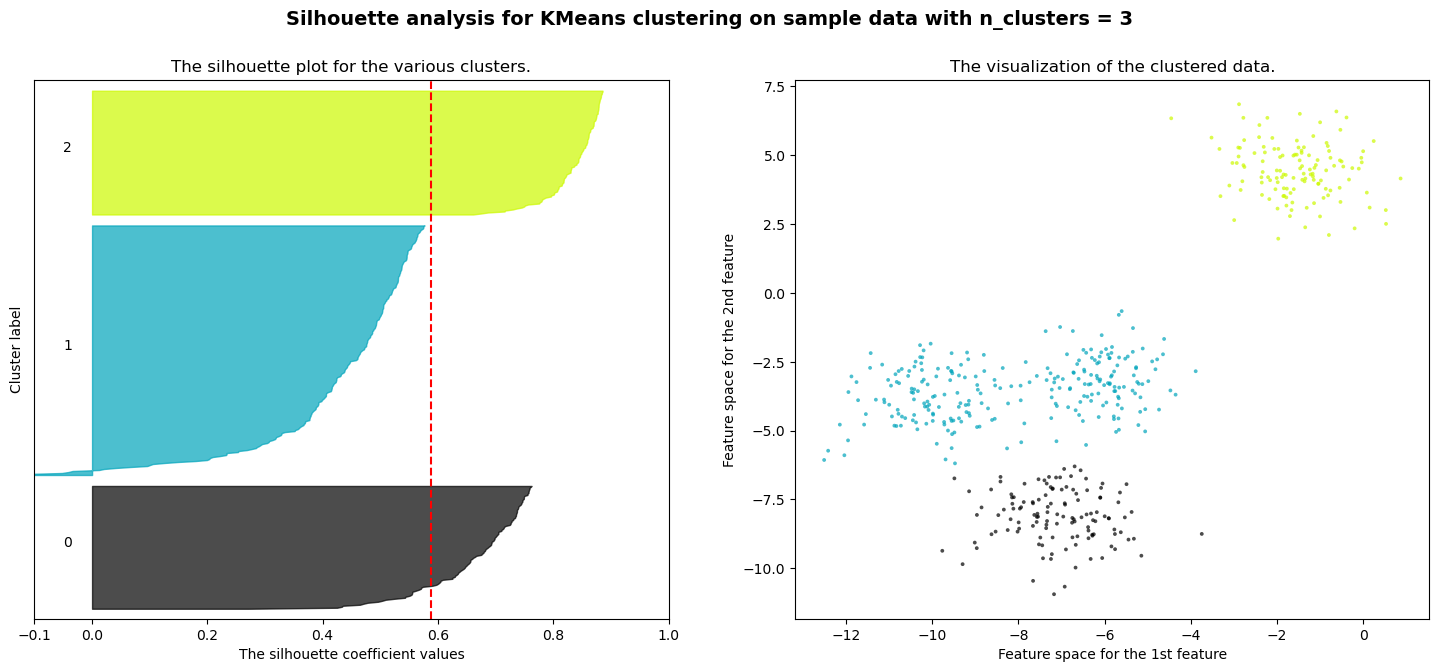

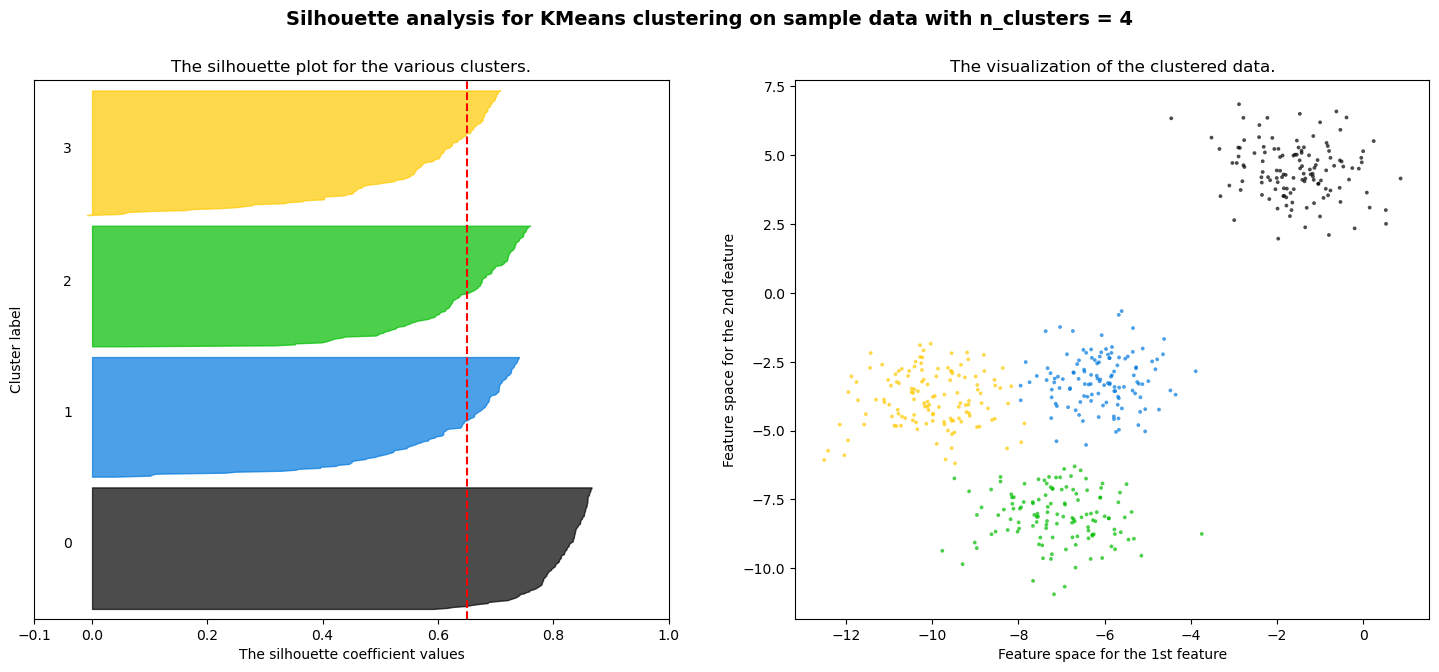

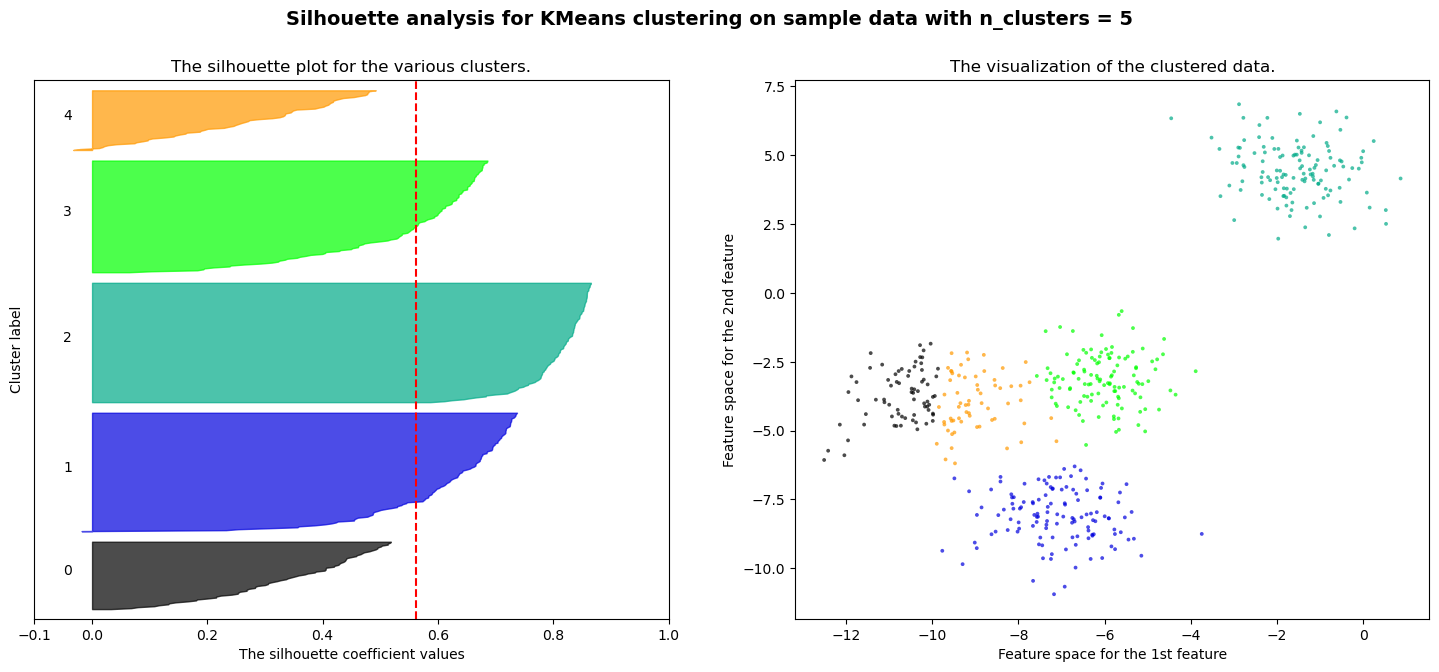

In [17]:
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize KMeans
    kmeans = myKmeans(n_clusters=n_clusters)
    # fit the data & predict cluster labels
    kmeans.fit(X)
    cluster_kmeans = kmeans.predict(X)

    silhouette_avg = silhouette_score(X, cluster_kmeans)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_kmeans)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_kmeans == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_kmeans.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

The best K is for two clusters, with a silhouette score of 0.7049. the second place is for four cluster, how is expected, with a silhouette score of 0.65. the other two experimentes has a good performance, but a poor adjusment for somes clusters

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.19793661559533043
For n_clusters = 4 The average silhouette_score is : 0.539090492884903
For n_clusters = 5 The average silhouette_score is : 0.4036383486701859


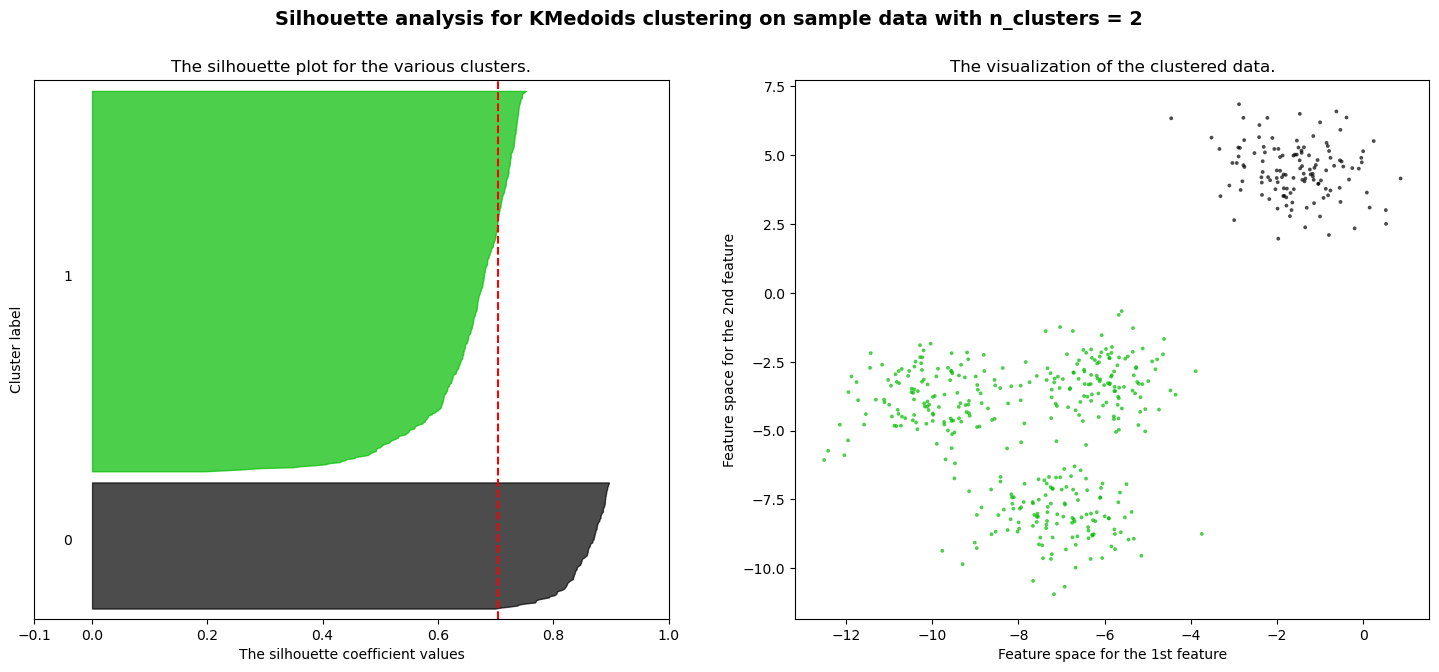

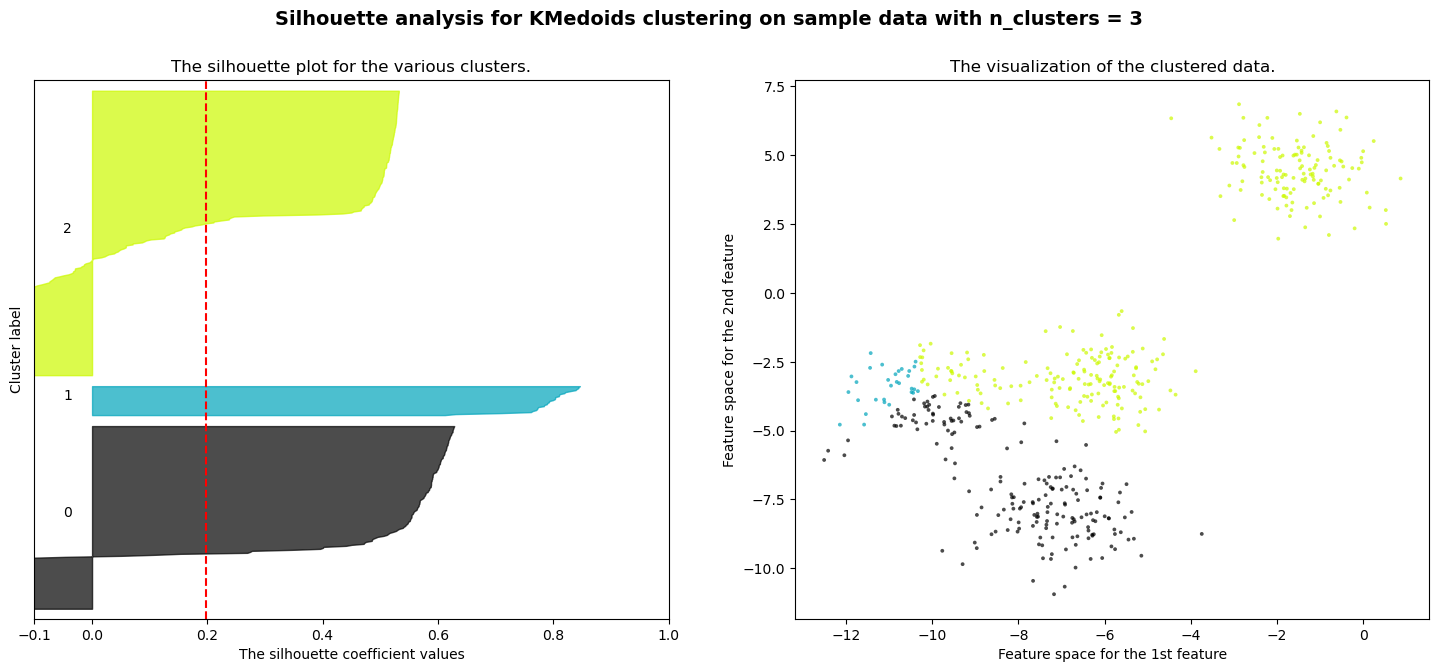

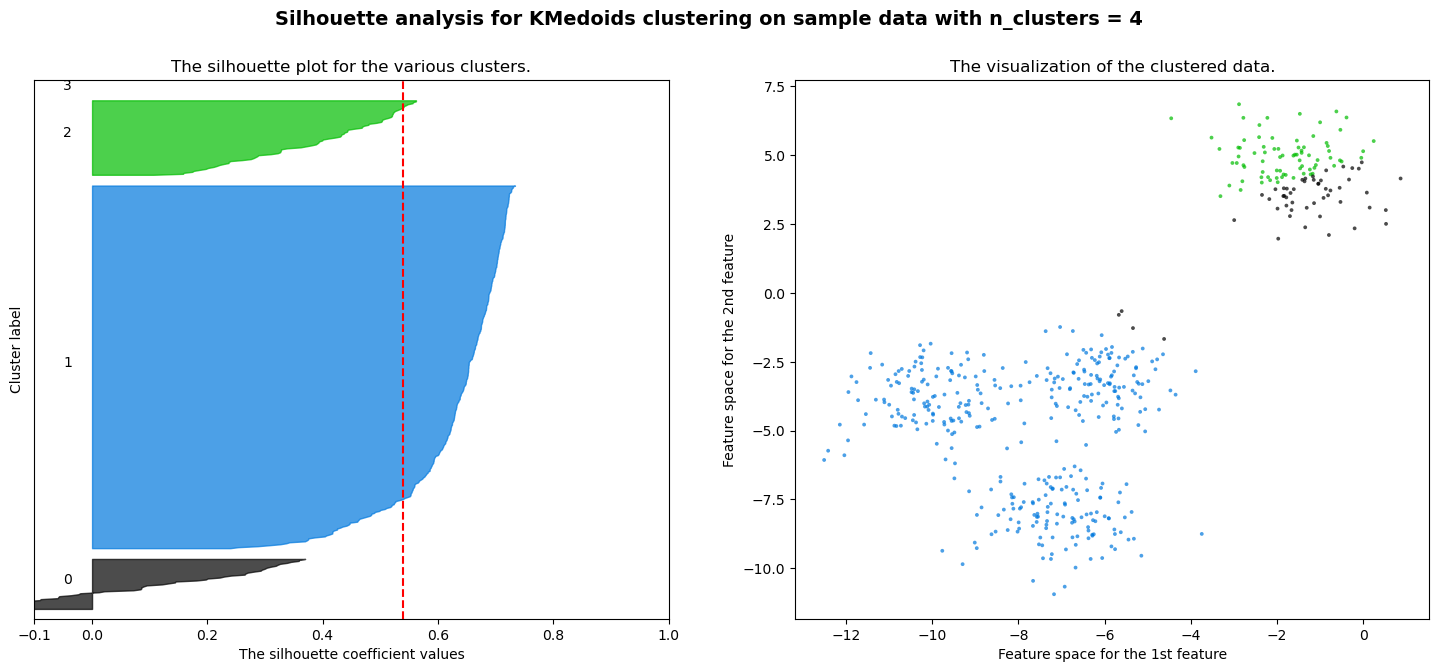

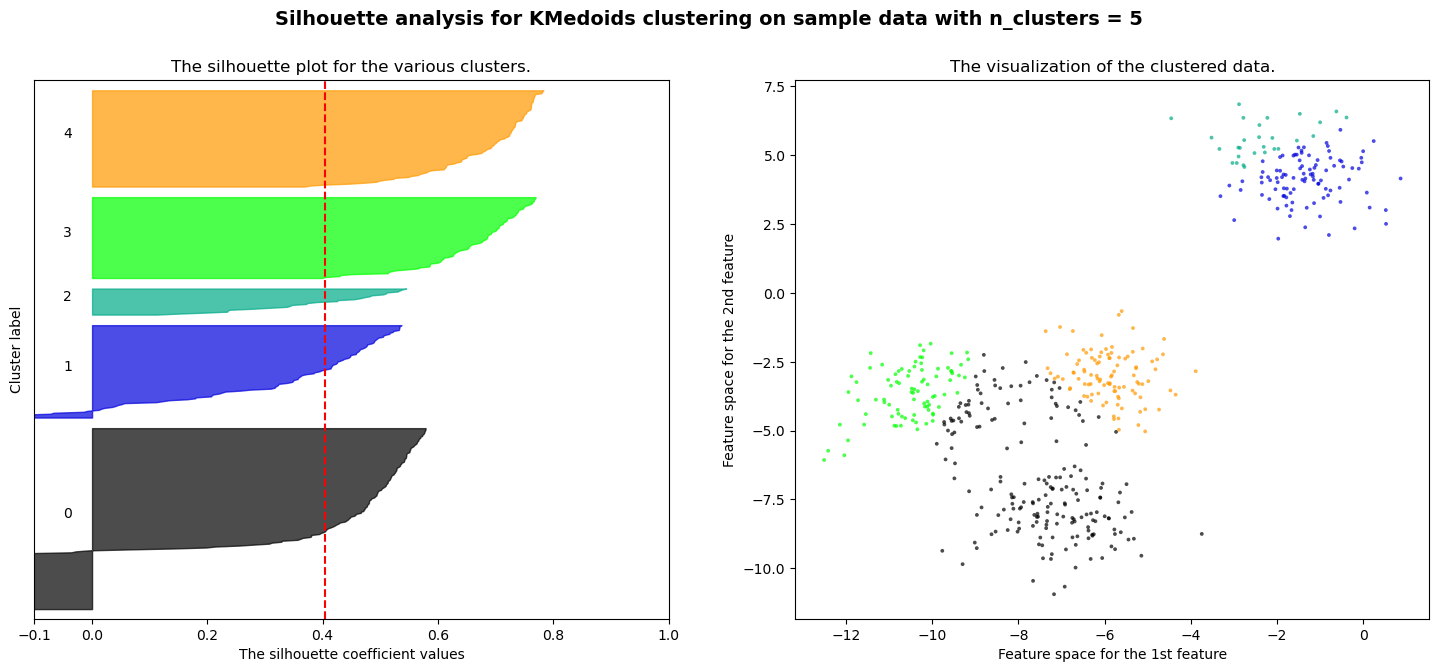

In [18]:
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    kmedoids = myKMedoids(n_clusters=n_clusters)
    # fit the data & predict cluster labels
    kmedoids.fit(X)
    cluster_kmedoids = kmedoids.predict(X)

    silhouette_avg = silhouette_score(X, cluster_kmedoids)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
        # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_kmedoids)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_kmedoids == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_kmedoids.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMedoids clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For Kmedoids, the best permonance is the same than for kmeans, two cluster with a silhouette score of 0.7049. The others cluster has a poor permonance with negativo values for a lot of groups and lows silhouette score, how is for three clusters.

# 5. Let’s use the newly created modules in unsupervised to cluster some toy data.

* a. Plot the different datasets in separate figures. What can you say about them?
* b. Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each dataset and compare the results of each algorithm with respect to each dataset.


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import SpectralClustering, DBSCAN
from sklearn import cluster, datasets, mixture

In [23]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

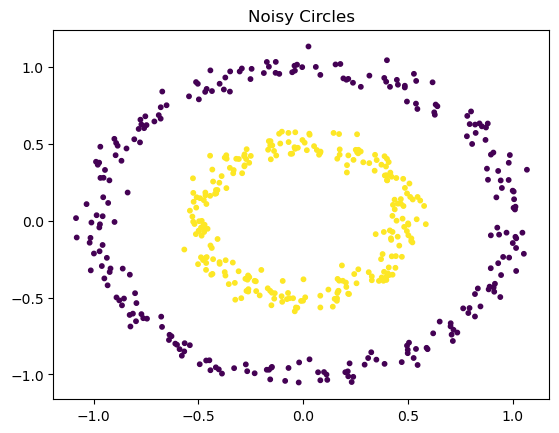

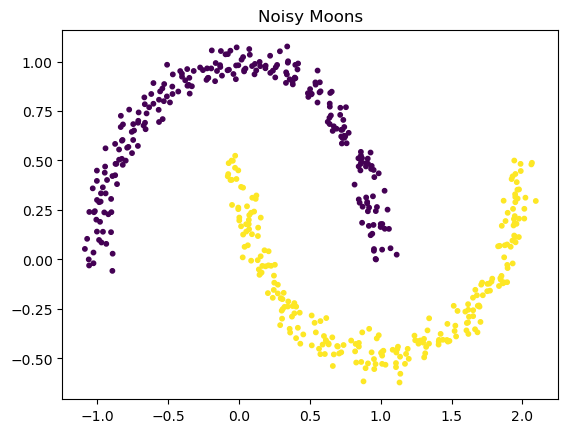

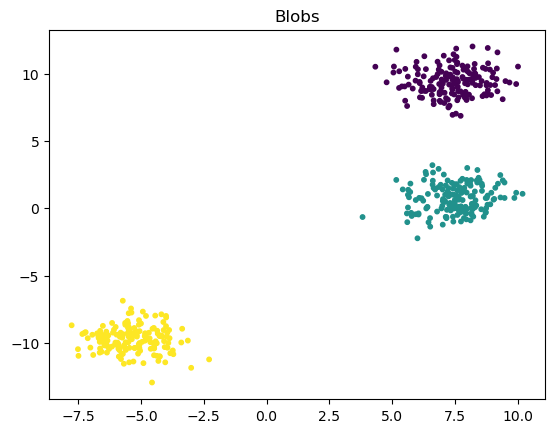

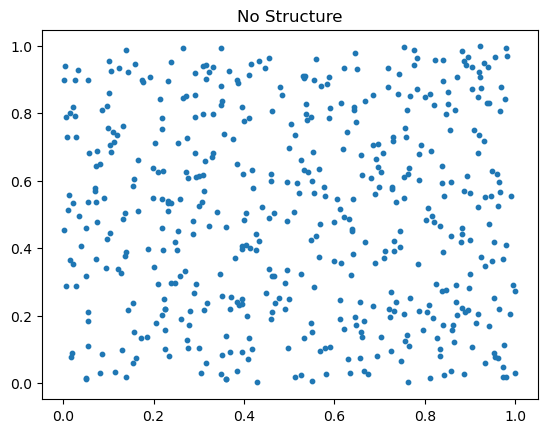

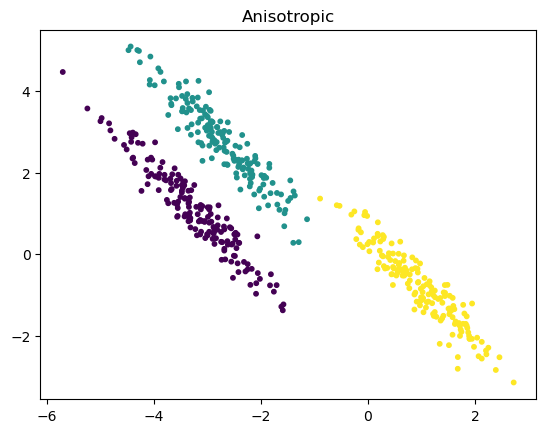

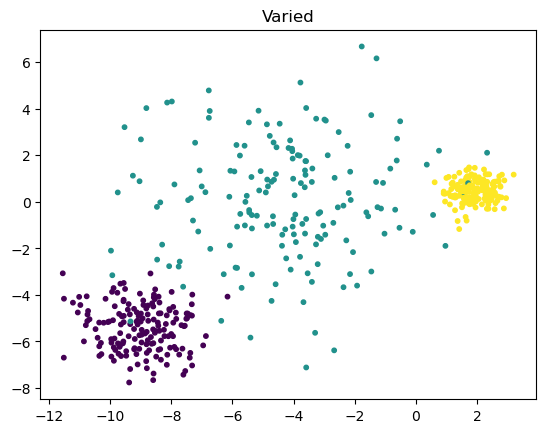

In [25]:
datasets = [('Noisy Circles', noisy_circles),
                ('Noisy Moons', noisy_moons),
                        ('Blobs', blobs),  
                            ('No Structure', no_structure), 
                                  ('Anisotropic', aniso),    
                                  ('Varied', varied),]

for i, (name, dataset) in enumerate(datasets):
    X, y = dataset
    plt.figure(i)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
    plt.title(name)
plt.show()

* Noisy Circle: Two circles one into the other, separate.
* Noisy Moons: Two Half circles, separate.
* Blobs: Three groups of points, separate.
* No Structure: White noisy
* Anisotropic: Three lines of points, separate.
* Varied: It seems like three groups, one very close, other a little bit more separate and the latest a cloud of noisy points.

In [26]:
# Initialize KMeans
kmeans = myKmeans(n_clusters=4)
# fit the data & predict cluster labels
kmeans.fit(X)
cluster_kmeans = kmeans.predict(X)

In [27]:
# Initialize KMeans
kmedoids = myKMedoids(n_clusters=4)
# fit the data & predict cluster labels
kmedoids.fit(X)
cluster_kmedoids = kmedoids.predict(X)

In [29]:
algorithms = {
    'KMeans': myKmeans(n_clusters=3),
    'KMedoids': myKMedoids(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.3, min_samples=10),
    'Spectral Clustering': SpectralClustering(n_clusters=3, affinity='nearest_neighbors')}

Dataset: Noisy Circles



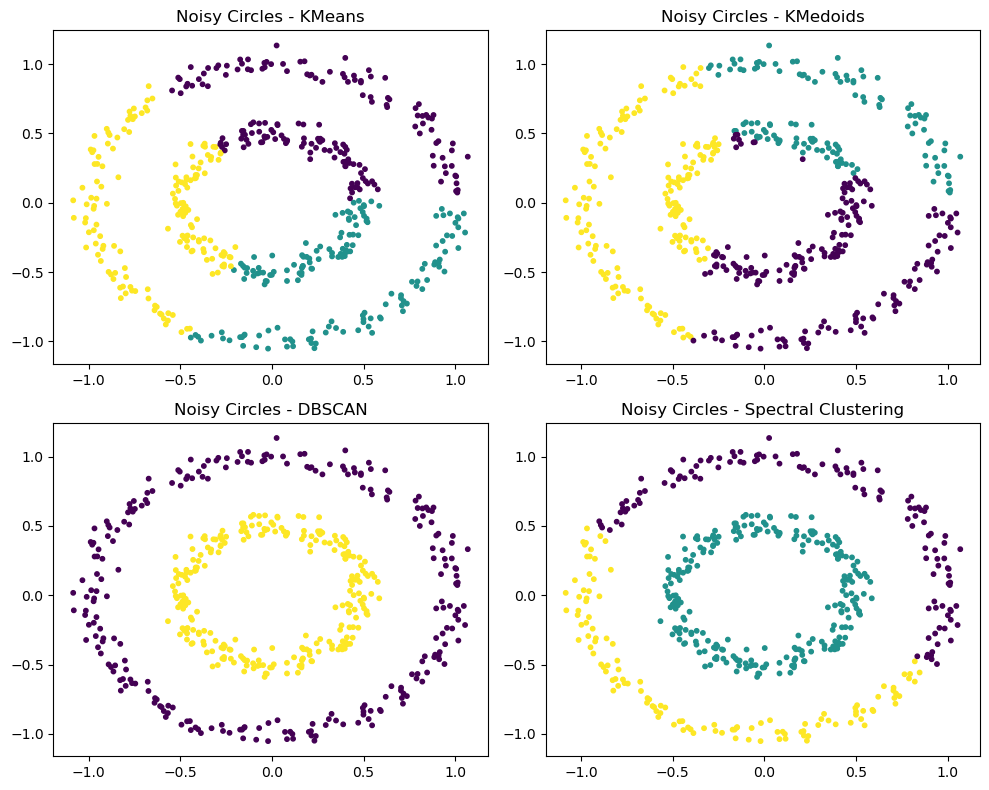

Dataset: Noisy Moons



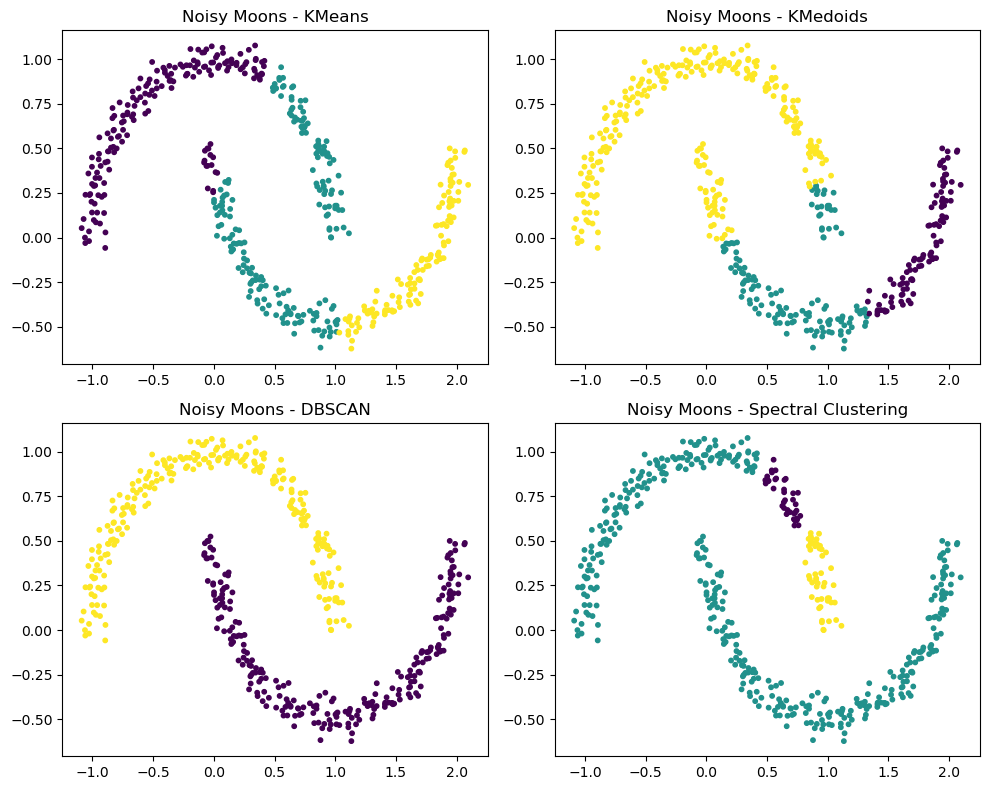

Dataset: Blobs



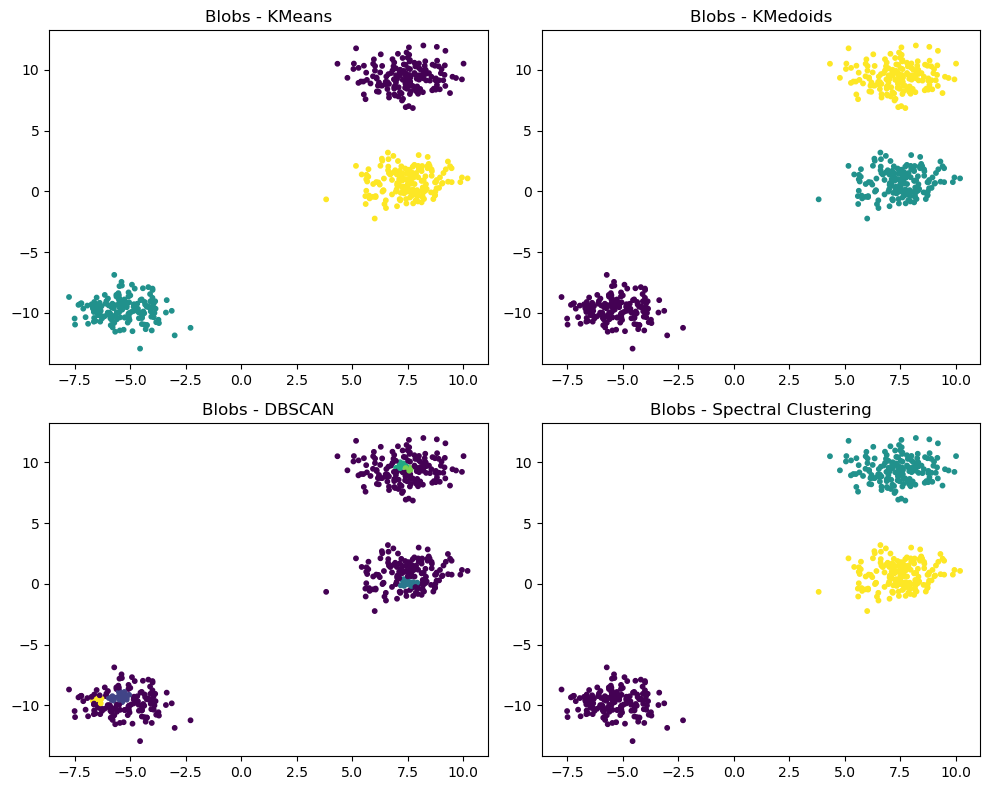

Dataset: No Structure



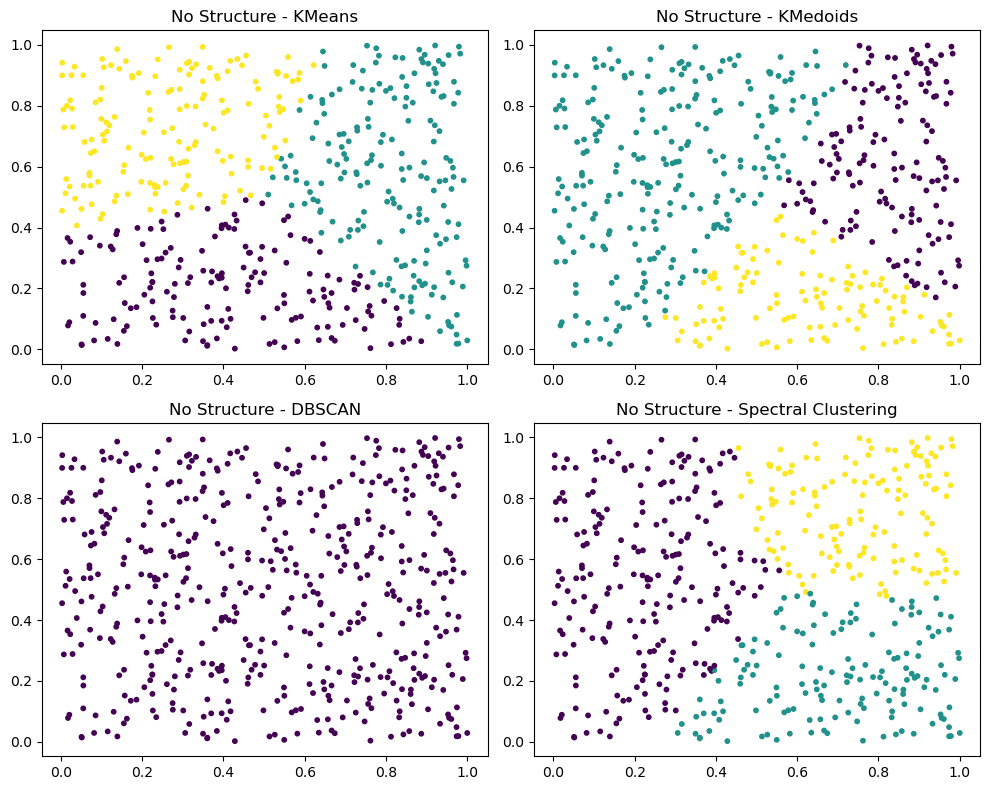

Dataset: Anisotropic



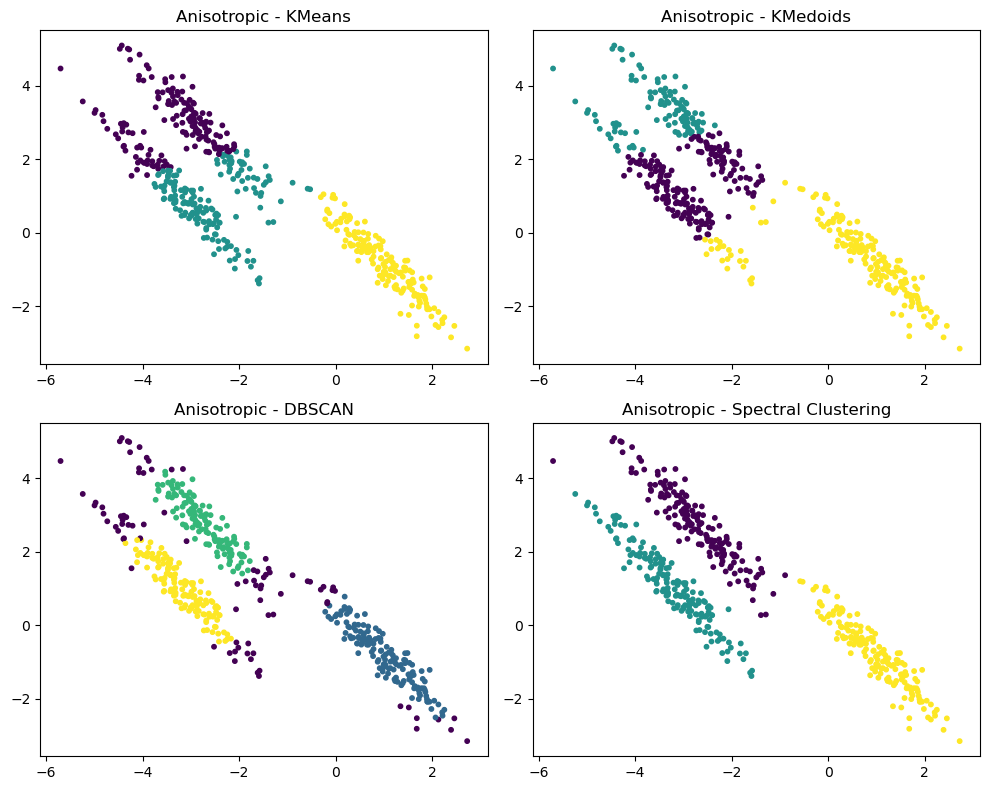

Dataset: Varied



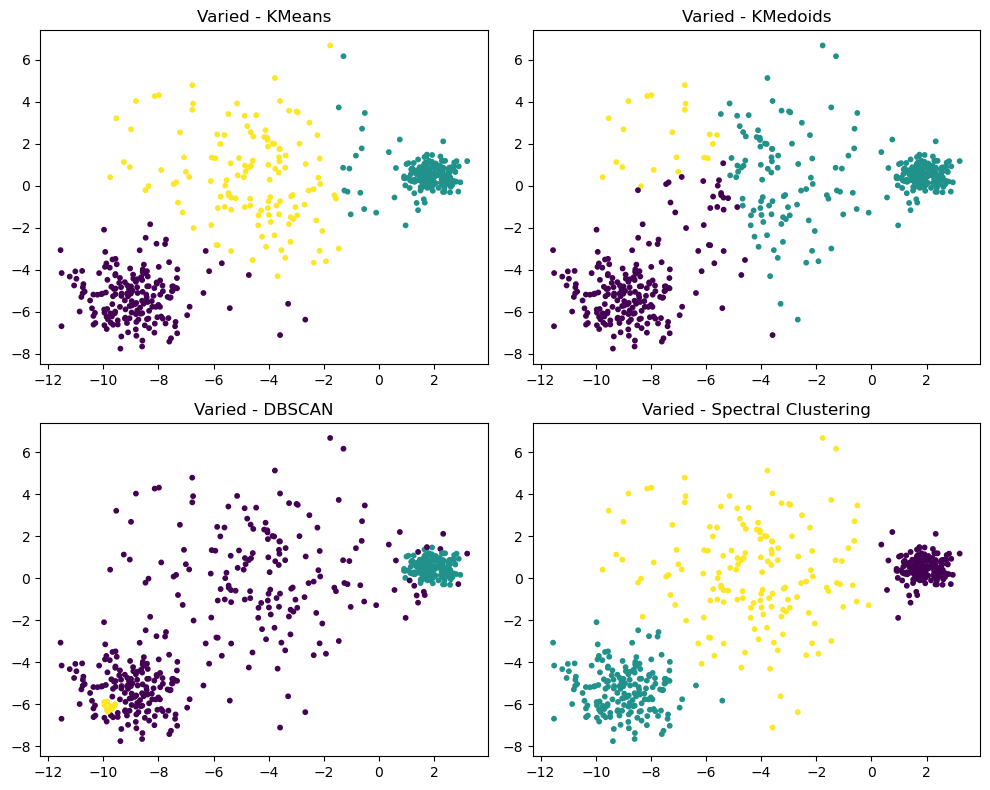

In [31]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

alg_idx_map = {'KMeans': 0, 'KMedoids': 1, 'DBSCAN': 2, 'Spectral Clustering': 3}

for i, (name, dataset) in enumerate(datasets):
    X, y = dataset
    print(f'Dataset: {name}\n')
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

    for ax, (alg_name, alg) in zip(axes.flatten(), algorithms.items()):

        if alg_name == 'KMeans':
            # Initialize KMeans
            # fit the data & predict cluster labels
            kmeans = myKmeans(n_clusters=3)
            kmeans.fit(X)
            y_pred = kmeans.predict(X)
        elif alg_name == 'KMedoids':  
            kmedoids = myKMedoids(n_clusters=3)
            # fit the data & predict cluster labels
            kmedoids.fit(X)
            y_pred = kmedoids.predict(X)
        else:
            y_pred = alg.fit_predict(X)

        ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=10)
        ax.set_title(f'{name} - {alg_name}')
    
    plt.tight_layout()
    plt.show()